In [22]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

In [15]:
data = np.genfromtxt("quasars.csv",dtype = float,delimiter = ",")

X, y = data[:,:-1], data[:,-1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2)


In [19]:
model = xgb.XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=4,
reg_lambda=1, n_estimators=500,objective = 'reg:squarederror')

X90, X10, y90, y10 = train_test_split(Xtrain,ytrain, test_size = 0.1)

model.fit(X90, y90,
        eval_set=[(X10, y10)],
        eval_metric='rmse',
        verbose=False)



{'validation_0': {'rmse': [0.715262,
   0.698216,
   0.683562,
   0.670179,
   0.659378,
   0.650882,
   0.64399,
   0.637394,
   0.632127,
   0.627476,
   0.623623,
   0.619389,
   0.617673,
   0.613907,
   0.610463,
   0.607643,
   0.606193,
   0.604652,
   0.603499,
   0.602258,
   0.601013,
   0.599998,
   0.599789,
   0.599683,
   0.59849,
   0.598696,
   0.598045,
   0.597654,
   0.596886,
   0.596704,
   0.597071,
   0.59629,
   0.596374,
   0.594376,
   0.593666,
   0.593271,
   0.592949,
   0.592768,
   0.592057,
   0.592609,
   0.592208,
   0.591918,
   0.591615,
   0.591587,
   0.591545,
   0.59131,
   0.590815,
   0.590666,
   0.590704,
   0.590407,
   0.590378,
   0.590547,
   0.590524,
   0.590975,
   0.590945,
   0.591151,
   0.590972,
   0.590846,
   0.590952,
   0.590771,
   0.590893,
   0.591124,
   0.59072,
   0.590544,
   0.590669,
   0.590763,
   0.590521,
   0.590454,
   0.589836,
   0.590029,
   0.590362,
   0.590364,
   0.589957,
   0.589752,
   0.589744,
   0.5

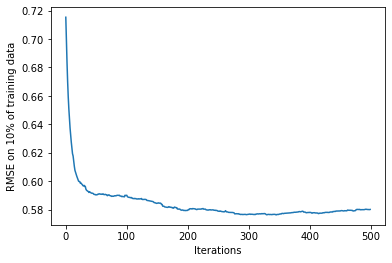

In [28]:
res = model.evals_result()
plt.plot(res['validation_0']['rmse'])
plt.xlabel("Iterations")
plt.ylabel("RMSE on 10% of training data")
plt.show()

In [29]:
pred = model.predict(Xtest)
np.sqrt(MSE(pred,ytest))

0.5421818480511011

In [30]:
grain = 3
params = {'colsample_bytree':np.linspace(0.1,1.1,grain), 'learning_rate':np.linspace(0.1,1.1,grain), 'max_depth':np.linspace(1,8,grain).astype(int), 
                         'reg_lambda':np.linspace(0,1,grain), 'n_estimators':np.linspace(100,500,grain).astype(int)}

model = xgb.XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=4, 
                         reg_lambda=1, n_estimators=500,objective = 'reg:squarederror',cv = 3)

search = GridSearchCV(model,params,verbose = 0)

search.fit(Xtrain,ytrain)



C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jakob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 1109, in update
    dtrain.handle))
  File "C:\Users\jakob\Anaconda3\lib\site-packages\xgboost\core.py", line 176, in _c

GridSearchCV(estimator=XGBRegressor(colsample_bytree=0.5, cv=3, max_depth=4,
                                    n_estimators=500,
                                    objective='reg:squarederror'),
             param_grid={'colsample_bytree': array([0.1, 0.6, 1.1]),
                         'learning_rate': array([0.1, 0.6, 1.1]),
                         'max_depth': array([1, 4, 8]),
                         'n_estimators': array([100, 300, 500]),
                         'reg_lambda': array([0. , 0.5, 1. ])})

In [33]:
search.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 100,
 'reg_lambda': 1.0}

In [34]:
best = xgb.XGBRegressor(**search.best_params_)

best.fit(X90,y90)

pred = best.predict(Xtest)
np.sqrt(MSE(ytest, pred))


[15:35:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5300488322539093